In [62]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

C:\Users\Jacob\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  after removing the cwd from sys.path.


In [108]:
def watSat(m1, m2):
    """
    Returns percent water saturation (w) of a sample (mass 1 (m1) relative to mass 2 (m2)).
    """
    return ((m2 - m1)/m1) * 100

In [109]:
def weighttomass(weight, g=9.81):
    """
    Returns mass for a given weight and gravity.
    """
    return weight/g

In [110]:
w_presat = 2836.5 # g
w_postsat = 2924.2 # g
w_postdry = 2834.5 # g

m_presat = weighttomass(w_presat)
m_postsat = weighttomass(w_postsat)
m_postdry = weighttomass(w_postdry)

In [113]:
watersat1 = watSat(m_presat, m_postsat)
watersat2 = watSat(m_presat, m_postdry)

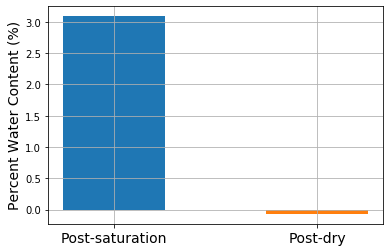

In [146]:
fig, ax = plt.subplots(figsize=(6,4))
plt.bar(0.5, watersat1, 0.05)
plt.bar(0.6, watersat2, 0.05)
ax.set_ylabel('Percent Water Content (%)', fontsize=14)
ax.set_xticks(np.arange(0.5,0.7,0.1))
ax.set_xticklabels(['Post-saturation', 'Post-dry'], fontsize=14)
plt.grid()
plt.show()

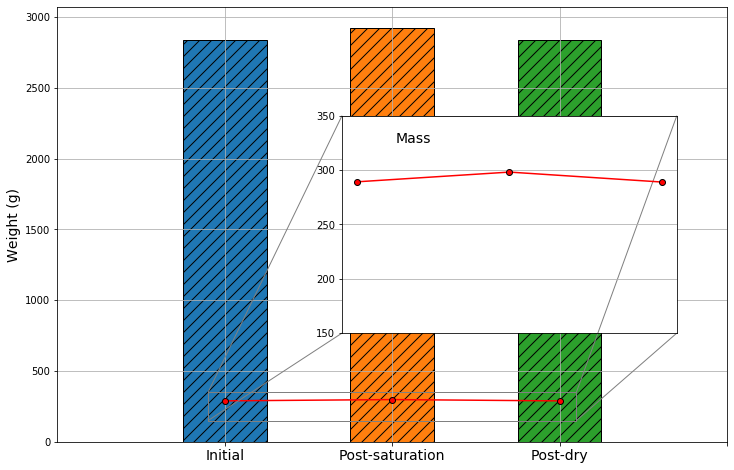

In [98]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax1.bar(0.5, w_presat, 0.1, edgecolor='black', hatch='//')
ax1.bar(0.7, w_postsat, 0.1, edgecolor='black', hatch='//')
ax1.bar(0.9, w_postdry, 0.1, edgecolor='black', hatch='//')
x=[0.5, 0.7, 0.9]
y=[m_presat, m_postsat, m_postdry]
ax1.plot(x, y, 'ro-', markeredgecolor='k')
plt.grid()
ax1.set_xlim(0.3,1.1)
ax1.set_ylabel('Weight (g)', fontsize=14)
ax1.set_xticks(np.arange(0.5,1.1,0.2))
ax1.set_xticklabels(['Initial', 'Post-saturation', 'Post-dry'], fontsize=14)


ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.425,0.25,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5', color='k')
mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5', color='k')
# The data: only display for low temperature in the inset figure.
ax2.plot(x, y, 'ro-', markeredgecolor='k')
ax2.text(0.55, 325, 'Mass', fontsize=14)
ax2.get_xaxis().set_visible(False)
plt.grid()

ax2.set_yticks(np.arange(150,400,50))
plt.show()